In [1]:
import numpy as np
import pandas as pd
import sklearn
import mglearn
from sklearnex  import  patch_sklearn 
patch_sklearn ()


dataset = pd.read_csv('dataset_limpio.csv')
dataset = dataset.drop(['Unnamed: 0'], axis=1)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


(343880,)


In [57]:
from sklearnex  import  patch_sklearn 
patch_sklearn ()
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin


def plot_figure(algoritm, data):
    
    estimator = algoritm.fit(data)
    labels= estimator.labels_

    
    
    k_means_cluster_centers = algoritm.cluster_centers_
    k_means_labels = pairwise_distances_argmin(data, k_means_cluster_centers)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    colors = ["#4EACC5", "#FF9C34", "#4E9A06"]
    for k, col in zip(range(n_clusters), colors):
        my_members = k_means_labels == k
        cluster_center = k_means_cluster_centers[k]
        plt.plot(
            data[my_members, 0], 
            data[my_members, 1],
            "w",
            markerfacecolor=col,
            markeredgecolor = "k",
            marker="o",
            markersize=4,)
        plt.plot(
            cluster_center[0],
            cluster_center[1],
            "*",
            markerfacecolor=col,
            markeredgecolor="w",
            markersize=8,
        )
#     plt.title("KMeans")
#     plt.show()
#     X = pd.DataFrame(X_pca)
#     print(X_pca[:,1])
#     print(X_pca[1,:].shape)
#     plt.figure(figsize=(8, 5))
#     plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, linewidths= 0.01, edgecolors='k')
#     plt.scatter(cluster_center[0], cluster_center[1], "*")
#     plt.savefig('kmeans.pdf')

def bench_marks(algoritm, name, data):
    
    t0 = time()
    
    estimator = algoritm.fit(dataset)
    labels= estimator.labels_
    
    fit_time = time() - t0
    results = [name, fit_time, estimator.inertia_]
    results += []

    results += [silhouette_score(dataset, labels, metric = 'euclidean')]
    results += [davies_bouldin_score(dataset,labels)]
    results += [calinski_harabasz_score(dataset, labels)]
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    results += [n_clusters]
    
    formatter_result = (
        "{:8s}\t\t{:.3f}s\t{:.0f}\t{:.3f}\t\t{:.3f}\t\t{:.2f}\t\t{:.0f}"
    )
    print(formatter_result.format(*results))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


__________________________________________________________________________________
init			time	inertia		silhouette	davies_bouldin	calinski_harabasz	n_clusters

[0 1]
[0 1]
KMeans(n_clusters=2)


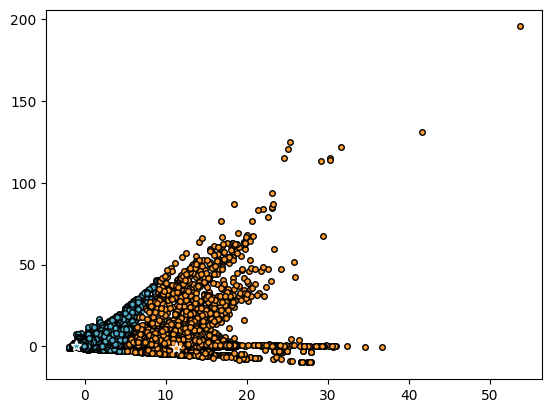

In [58]:
from sklearn.cluster import KMeans
from sklearnex  import  patch_sklearn 
patch_sklearn ()


print(82 * "_")
print("init\t\t\ttime\tinertia\t\tsilhouette\tdavies_bouldin\tcalinski_harabasz\tn_clusters\n")

n_clusters = [2, 3, 4, 5]
random_state = np.random.seed(42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset)
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X_scaled)

for i in n_clusters:
    
#     #kmeans
    kmeans = KMeans(init="random", n_clusters= i, random_state=random_state)
    bench_marks(kmeans, name="random", data = X_pca)
    kmeans = KMeans(init="k-means++", n_clusters= i, random_state=random_state)
    bench_marks(kmeans, name="k-means++", data = X_pca)

    
# print(82 * "_")
kmeans = KMeans(init="k-means++", n_clusters= 2, random_state=random_state)
plot_figure(kmeans, X_pca)